In [1]:
#!/usr/bin/python

# Import the necessary libraries
import astropy.io.fits as pyfits
import gc
import numpy as np
import sys
import os
import time
from glob import glob

from astropy import constants as const, units as u
from astropy.coordinates import SkyCoord
from collections import Counter

from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import gridspec
from matplotlib import rc, rcParams

import trough_modules_all as utils

In [2]:
# Radii theta of circular regions (in deg)
#thetalist = np.array([5., 10., 15., 20.])/60.
thetalist = np.array([5.])/60.
Ntheta = len(thetalist)

print('Theta:', thetalist*60., 'arcmin')
print()




# Names of the KiDS fields
kidsfields = ['G9', 'G12', 'G15', 'G23', 'GS']

# Boundaries of the KiDS fields
coordsG9 = np.array([[128.0,142.5], [-2.5,3.5]])
coordsG12 = np.array([[155.0,190.0], [-3.5,3.5]])
coordsG15 = np.array([[209.5,239.0], [-3.5,3.5]])
coordsG23 = np.array([[328.0,361.0], [-35.0,-28.0]])
coordsGS = np.array([[31.0,54.0], [-35.0,-29.0]])
kidsboundaries = np.array([coordsG9,coordsG12,coordsG15,coordsG23,coordsGS]) # Boundaries of all fields

Theta: [ 5.] arcmin



In [3]:
### 1) Defining the galaxy sample:

## 1a) Importing the galaxy catalogue.

# Select the galaxy catalogue for trough selection (kids/gama)
cat = 'gama'

if cat == 'kids':
    
    # Path to the KiDS fieldsc
    path_kidscat = '/data2/brouwer/KidsCatalogues'
    kidscatname = 'KiDS.DR3.zpbpzLess0.6.fits'
    
    # Importing the KiDS coordinates
    galRA, galDEC, galZ, galTB, mag_auto, ODDS, umag, gmag, rmag, imag = \
    utils.import_kidscat(path_kidscat, kidscatname)
    gridmax = 1./60.

if cat == 'gama':
    
    # Path to the KiDS fields
    path_gamacat = '/data2/brouwer/MergedCatalogues/'
    gamacatname = 'ShearMergedCatalogueAll_sv0.8.fits'
    
    # Importing the GAMA coordinates
    galRA, galDEC, galZ, rmag, rmag_abs = utils.import_gamacat(path_gamacat, gamacatname)
    gridmax = 20./60.

Written: gama_redshift_hist


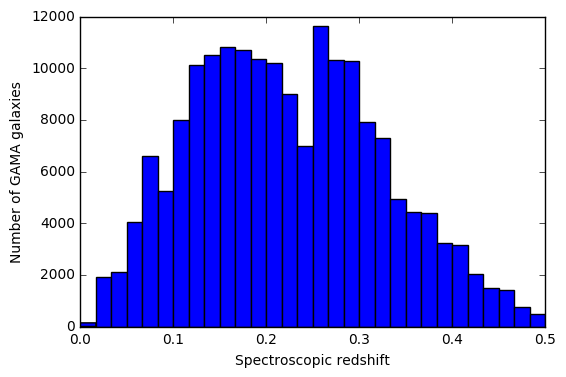

In [4]:
n, edges, patches = plt.hist(galZ, 30, [0.0, 0.5])

xlabel = 'Spectroscopic redshift'
ylabel = 'Number of GAMA galaxies'

plt.xlabel('Spectroscopic redshift')
plt.ylabel('Number of GAMA galaxies')

dx = edges[1] - edges[0]
bins = (edges + dx)[0:-1]

hist = np.array([bins, n])

filename = 'gama_redshift_hist'
hist_header = 'Redshift    N(z)'

plt.savefig('gal_info/%s.png'%filename)

np.savetxt('gal_info/%s.txt'%filename, hist.T, delimiter='    ',  fmt='%.6g', header = hist_header)
print('Written:', filename)

plt.show()

Written: gama_magnitude_hist


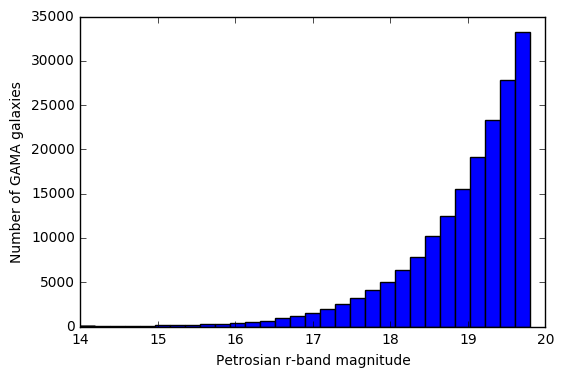

In [5]:
n, edges, patches = plt.hist(rmag, 30, [14, 19.8])

plt.xlabel('Petrosian r-band magnitude')
plt.ylabel('Number of GAMA galaxies')

dx = edges[1] - edges[0]
bins = (edges + dx)[0:-1]

hist = np.array([bins, n])

filename = 'gama_magnitude_hist'
hist_header = 'mag_r(Petro)    N(m)'

plt.savefig('gal_info/%s.png'%filename)

np.savetxt('gal_info/%s.txt'%filename, hist.T, delimiter='    ',  fmt='%.6g', header = hist_header)
print('Written:', filename)

plt.show()

Written: gama_absmag_hist


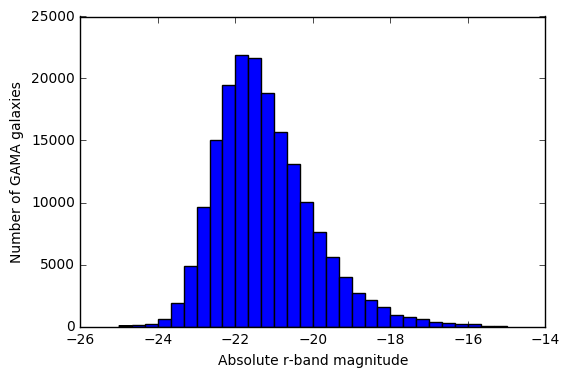

In [6]:
n, edges, patches = plt.hist(rmag_abs, 30, [-25.,-15.])


plt.xlabel('Absolute r-band magnitude')
plt.ylabel('Number of GAMA galaxies')

dx = edges[1] - edges[0]
bins = (edges + dx)[0:-1]

hist = np.array([bins, n])

filename = 'gama_absmag_hist'
hist_header = 'absmag_r    N(M)'

plt.savefig('gal_info/%s.png'%filename)

np.savetxt('gal_info/%s.txt'%filename, hist.T, delimiter='    ',  fmt='%.6g', header = hist_header)
print('Written:', filename)

plt.show()